In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [29]:
# GLOBAL VARIABLES
NUM_ROWS = 5
NUM_COLUMNS = 5

In [2]:
# Loading fashion mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [3]:
print(np.unique(train_y))

[0 1 2 3 4 5 6 7 8 9]


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Default names of the dataset

In [5]:
# Check input shapes and lengths
print(f"Train Images Shape: {train_x.shape}\n",
     f"Train Images Label Size: {len(train_y)}\n"
    f"Test Images Shape: {test_x.shape}\n",
     f"Test Images Label Size: {len(test_y)}\n"
     )

Train Images Shape: (60000, 28, 28)
 Train Images Label Size: 60000
Test Images Shape: (10000, 28, 28)
 Test Images Label Size: 10000



In [6]:
def show_train_images(index1: int) -> None:
    plt.figure(figsize=(NUM_COLUMNS,NUM_ROWS))
    for index in range(index1, index1 + NUM_ROWS*NUM_COLUMNS):
        plt.subplot(NUM_ROWS, NUM_COLUMNS, index% (NUM_COLUMNS*NUM_ROWS) + 1)
        plt.imshow(train_x[index])
        plt.xlabel(class_names[train_y[index]])
        plt.xticks([])
        plt.yticks([])
        # plt.colorbar()
    plt.show()

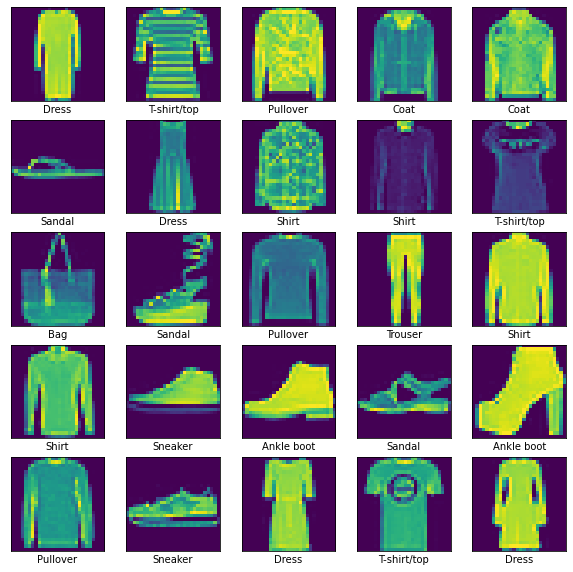

In [7]:
show_train_images(25)


In [8]:
# Normalization
train_x = train_x / 255.0
test_x = test_x / 255.0

In [9]:
# Generate a model section
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [10]:
# Model optimization section
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [11]:
# Model Training section
model.fit(train_x, train_y, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 2s 998us/step - loss: 0.5514 - accuracy: 0.8038
Epoch 2/50
1875/1875 [==============================] - 2s 938us/step - loss: 0.4193 - accuracy: 0.8487
Epoch 3/50
1875/1875 [==============================] - 2s 940us/step - loss: 0.3838 - accuracy: 0.8606
Epoch 4/50
1875/1875 [==============================] - 2s 940us/step - loss: 0.3654 - accuracy: 0.8668
Epoch 5/50
1875/1875 [==============================] - 2s 957us/step - loss: 0.3508 - accuracy: 0.8710
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3335 - accuracy: 0.8767
Epoch 7/50
1875/1875 [==============================] - 2s 975us/step - loss: 0.3278 - accuracy: 0.8789
Epoch 8/50
1875/1875 [==============================] - 2s 981us/step - loss: 0.3185 - accuracy: 0.8815
Epoch 9/50
1875/1875 [==============================] - 2s 969us/step - loss: 0.3126 - accuracy: 0.8851
Epoch 10/50
1875/1875 [==============================] - 2s 966us/

In [12]:
# Checking values

test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)
print("Test Loss: {}\tTest Accuracy: {}".format(test_loss, test_acc))

313/313 - 0s - loss: 0.3663 - accuracy: 0.8903
Test Loss: 0.3662707209587097	Test Accuracy: 0.8902999758720398


In [13]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [14]:
predictions = probability_model.predict(test_x)

In [15]:
predictions[0]

array([8.8483323e-15, 1.7044792e-16, 6.7094532e-17, 1.0733235e-20,
       3.1171351e-20, 1.5498043e-05, 3.3159529e-16, 3.3940945e-04,
       1.0378702e-14, 9.9964511e-01], dtype=float32)

In [20]:
# Check label
np.argmax(predictions[1])

2

## Visualization Section

In [21]:
def plot_image(i, prediction_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(prediction_array),
                                         class_names[true_label],
                                         color=color
                                        ))

In [35]:
def plot_value_array(i, prediction_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    
    thisplot = plt.bar(range(len(class_names)), prediction_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [36]:
def plot_predictions():
    num_images = NUM_COLUMNS * NUM_ROWS
    plt.figure(figsize=(2*2*NUM_COLUMNS, 2*NUM_ROWS))
    for i in range(num_images):
        plt.subplot(NUM_ROWS, 2*NUM_COLUMNS, 2*i + 1)
        plot_image(i, predictions[i], test_y, test_x)
        plt.subplot(NUM_ROWS, 2*NUM_COLUMNS, 2*i + 2)
        plot_value_array(i, predictions[i], test_y)
        
    plt.tight_layout()
    plt.show()

In [48]:
def plot_one_prediction(index: int) -> None:
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plot_image(index, predictions[index], test_y, test_x)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions[index], test_y)
    
    plt.tight_layout()
    plt.show()

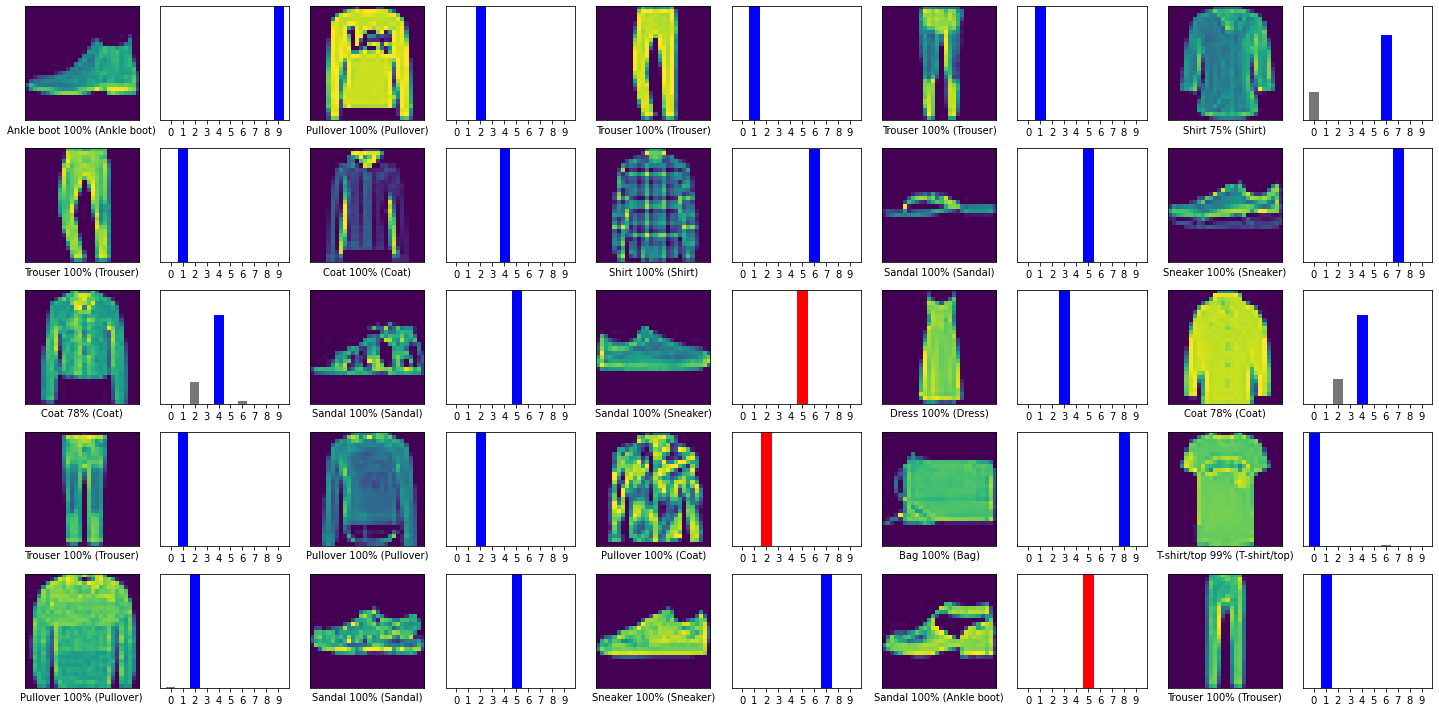

In [46]:
plot_predictions()

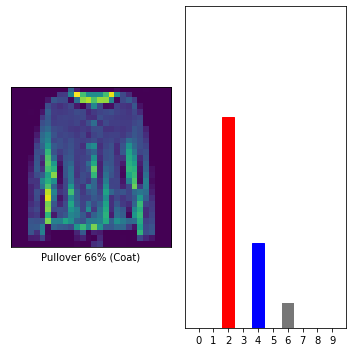

In [49]:
plot_one_prediction(25)

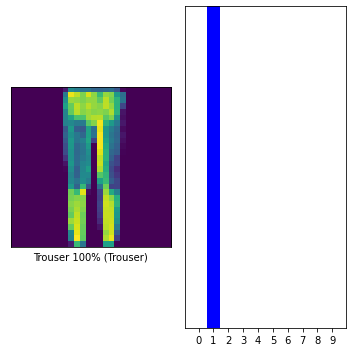

In [50]:
plot_one_prediction(3)

In [51]:
model.save('fashion_mnist.h5')

### Contact

#### [GitHub](https://github.com/uysalserkan)
#### [Linkedin](https://linkedin.com/in/uysalserkan)